In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from Net import Net
from utils import train, test, plt_graph

In [2]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             144
              ReLU-2           [-1, 16, 26, 26]               0
       BatchNorm2d-3           [-1, 16, 26, 26]              32
            Conv2d-4           [-1, 16, 24, 24]           2,304
              ReLU-5           [-1, 16, 24, 24]               0
       BatchNorm2d-6           [-1, 16, 24, 24]              32
            Conv2d-7            [-1, 8, 24, 24]             128
            Conv2d-8            [-1, 8, 24, 24]             576
              ReLU-9            [-1, 8, 24, 24]               0
      BatchNorm2d-10            [-1, 8, 24, 24]              16
        MaxPool2d-11            [-1, 8, 12, 12]               0
           Conv2d-12           [-1, 16, 10, 10]           1,152
             ReLU-13           [-1, 16, 10, 10]               0
      BatchNorm2d-14           [-1, 16,

In [3]:
torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=True, download=True,
                    transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('../data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)


In [4]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
criterion = F.nll_loss

# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, 20):
    train_acc,train_losses = train(model, device, train_loader, optimizer, criterion, train_acc, train_losses)
    test_acc, test_losses = test(model, device, test_loader, criterion, test_acc, test_losses)
    for param_group in optimizer.param_groups:
      print(param_group['lr'],epoch+1)

Train: Loss=0.0784 Batch_id=468 Accuracy=85.42: 100%|██████████| 469/469 [00:21<00:00, 21.41it/s]


Test set: Average loss: 0.0008, Accuracy: 9751/10000 (97.51%)

0.01 2


Train: Loss=0.0807 Batch_id=468 Accuracy=97.67: 100%|██████████| 469/469 [00:18<00:00, 24.70it/s]


Test set: Average loss: 0.0005, Accuracy: 9804/10000 (98.04%)

0.01 3


Train: Loss=0.0252 Batch_id=468 Accuracy=98.37: 100%|██████████| 469/469 [00:19<00:00, 23.58it/s]


Test set: Average loss: 0.0004, Accuracy: 9841/10000 (98.41%)

0.01 4


Train: Loss=0.0664 Batch_id=468 Accuracy=98.68: 100%|██████████| 469/469 [00:19<00:00, 23.81it/s]


Test set: Average loss: 0.0004, Accuracy: 9850/10000 (98.50%)

0.01 5


Train: Loss=0.0224 Batch_id=468 Accuracy=98.85: 100%|██████████| 469/469 [00:18<00:00, 24.88it/s]


Test set: Average loss: 0.0003, Accuracy: 9895/10000 (98.95%)

0.01 6


Train: Loss=0.0754 Batch_id=468 Accuracy=98.94: 100%|██████████| 469/469 [00:19<00:00, 24.03it/s]


Test set: Average loss: 0.0003, Accuracy: 9874/10000 (98.74%)

0.01 7


Train: Loss=0.0385 Batch_id=468 Accuracy=99.08: 100%|██████████| 469/469 [00:19<00:00, 23.95it/s]


Test set: Average loss: 0.0003, Accuracy: 9865/10000 (98.65%)

0.01 8


Train: Loss=0.0066 Batch_id=468 Accuracy=99.10: 100%|██████████| 469/469 [00:19<00:00, 23.95it/s]


Test set: Average loss: 0.0002, Accuracy: 9902/10000 (99.02%)

0.01 9


Train: Loss=0.0278 Batch_id=468 Accuracy=99.21: 100%|██████████| 469/469 [00:18<00:00, 24.92it/s]


Test set: Average loss: 0.0003, Accuracy: 9899/10000 (98.99%)

0.01 10


Train: Loss=0.0253 Batch_id=468 Accuracy=99.26: 100%|██████████| 469/469 [00:18<00:00, 25.13it/s]


Test set: Average loss: 0.0003, Accuracy: 9883/10000 (98.83%)

0.01 11


Train: Loss=0.0182 Batch_id=468 Accuracy=99.36: 100%|██████████| 469/469 [00:19<00:00, 23.84it/s]


Test set: Average loss: 0.0003, Accuracy: 9901/10000 (99.01%)

0.01 12


Train: Loss=0.0414 Batch_id=468 Accuracy=99.41: 100%|██████████| 469/469 [00:19<00:00, 23.66it/s]


Test set: Average loss: 0.0002, Accuracy: 9905/10000 (99.05%)

0.01 13


Train: Loss=0.0459 Batch_id=468 Accuracy=99.44: 100%|██████████| 469/469 [00:18<00:00, 24.86it/s]


Test set: Average loss: 0.0003, Accuracy: 9887/10000 (98.87%)

0.01 14


Train: Loss=0.0041 Batch_id=468 Accuracy=99.47: 100%|██████████| 469/469 [00:19<00:00, 23.76it/s]


Test set: Average loss: 0.0002, Accuracy: 9903/10000 (99.03%)

0.01 15


Train: Loss=0.0096 Batch_id=468 Accuracy=99.50: 100%|██████████| 469/469 [00:19<00:00, 23.75it/s]


Test set: Average loss: 0.0003, Accuracy: 9888/10000 (98.88%)

0.01 16


Train: Loss=0.0387 Batch_id=468 Accuracy=99.53: 100%|██████████| 469/469 [00:19<00:00, 23.91it/s]


Test set: Average loss: 0.0003, Accuracy: 9896/10000 (98.96%)

0.01 17


Train: Loss=0.0126 Batch_id=468 Accuracy=99.61: 100%|██████████| 469/469 [00:18<00:00, 25.16it/s]


Test set: Average loss: 0.0003, Accuracy: 9892/10000 (98.92%)

0.01 18


Train: Loss=0.0634 Batch_id=468 Accuracy=99.57: 100%|██████████| 469/469 [00:19<00:00, 24.50it/s]


Test set: Average loss: 0.0002, Accuracy: 9920/10000 (99.20%)

0.01 19


Train: Loss=0.0097 Batch_id=468 Accuracy=99.58: 100%|██████████| 469/469 [00:19<00:00, 23.85it/s]


Test set: Average loss: 0.0003, Accuracy: 9887/10000 (98.87%)

0.01 20


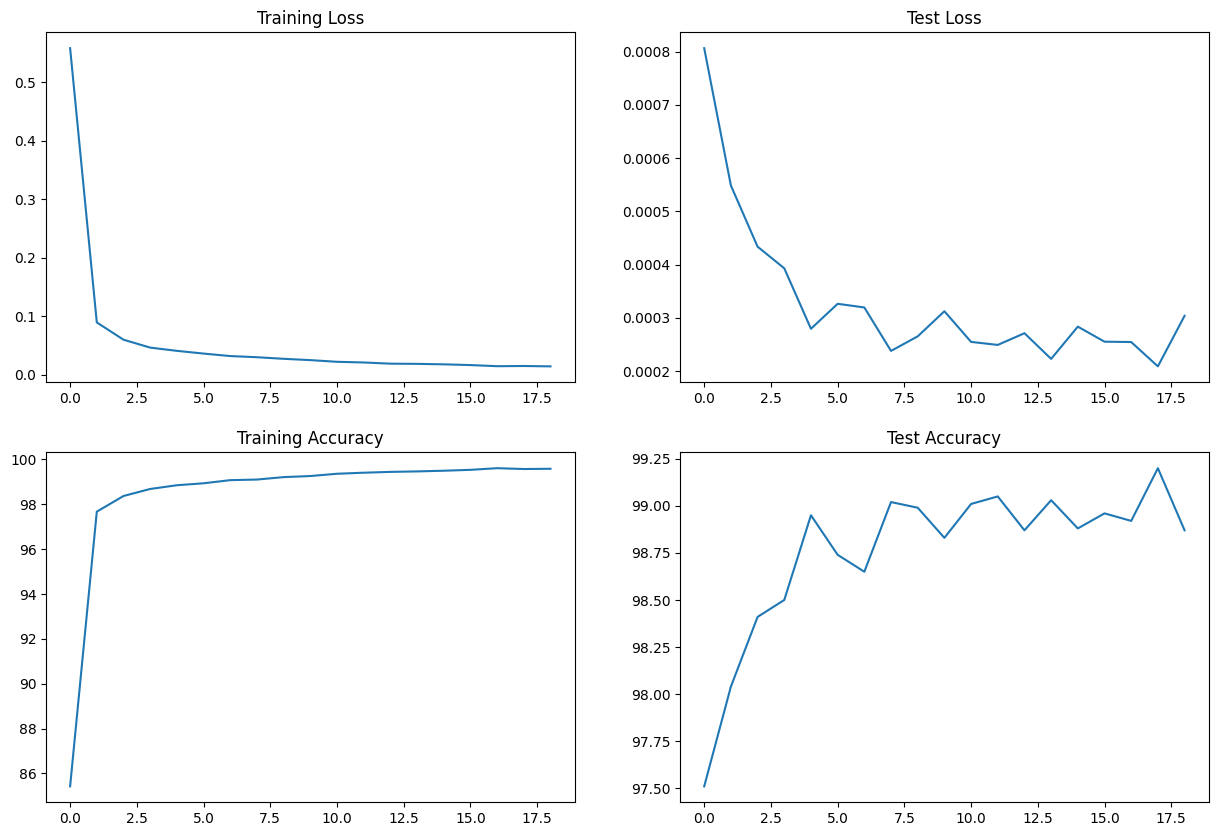

In [5]:
plt_graph(train_losses,test_losses,train_acc,test_acc)